In [13]:
%matplotlib inline
%pip install lightkurve
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
import lightkurve as lk

In [15]:
TIC = 'TIC 55525572'
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9]
lc_collection = available_data_select.download_all().stitch()

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

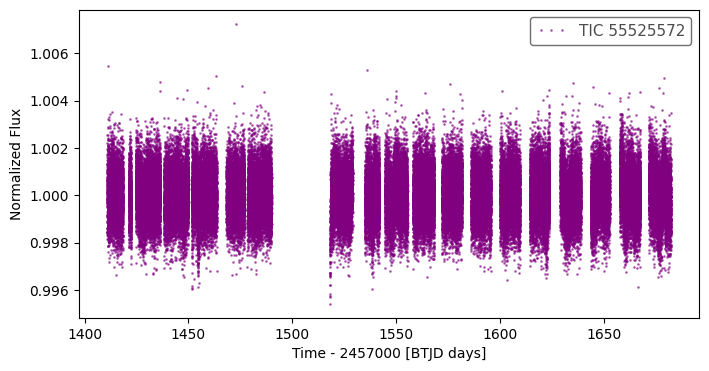

In [16]:
fig, ax = plt.subplots(figsize = (8, 4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.5)

# Phase Folding

!To-Do: Automatically query ExoFOP

In [19]:
period = 83.8979 # Changes based on KOI/TOI
t0 = 2125.847

In [20]:
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

In [21]:
lc_phased_binned = lc_phased.bin(15 / 24 / 60)

(0.996, 1.004)

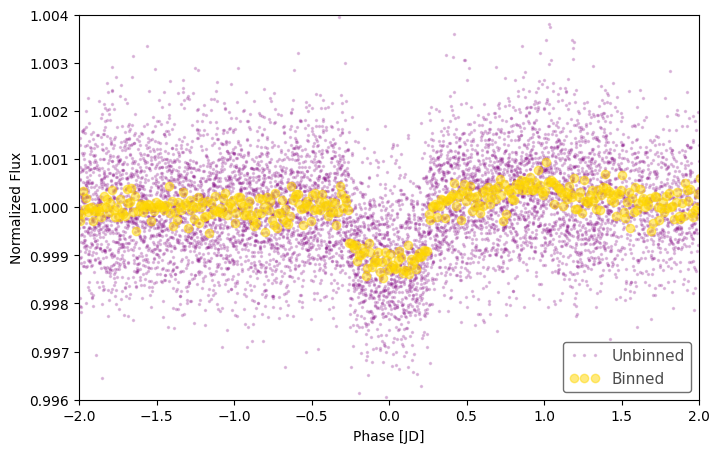

In [22]:
fig, ax = plt.subplots(figsize = ( 8, 5 ))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'purple', alpha = 0.2, markersize = 3, label = 'Unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'gold', alpha = 0.5, markersize = 6, label = 'Binned')

plt.xlim(-2, 2) # Remove some of the output -> zoom in on area of transit (candidate)
plt.ylim(0.996, 1.004)